Welcome to the jupyter notebook! To run any cell, press `Shift+Enter` or `Ctrl+Enter`.

**IMPORTANT** : Please have a look at `Help->User Interface Tour` and `Help->Keyboard Shortcuts` in the toolbar above that will help you get started.

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Notebook Basics

A cell contains any type of python inputs (expression, function definitions, etc...). Running a cell is equivalent to input this block in the python interpreter. The notebook will print the output of the last executed line.

In [2]:
1

1

In [3]:
x = [2, 3, 4]


def my_function(l):
    l.append(12)

In [4]:
my_function(x)

x

[2, 3, 4, 12]

Text(0, 0.5, 'Y label')

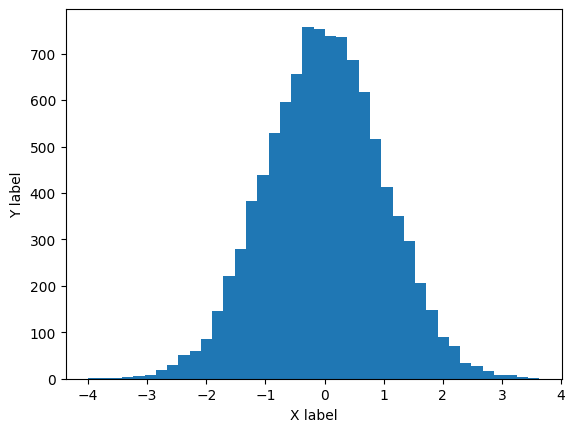

In [5]:
# Matplotlib is used for plotting, plots are directly embedded in the
# notebook thanks to the '%matplolib inline' command at the beginning
plt.hist(np.random.randn(10000), bins=40)
plt.xlabel("X label")
plt.ylabel("Y label")

Numpy Basics
============

**IMPORTANT** : the numpy documentation is quite good. The Notebook system is really good to help you. Use the Auto-Completion with `Tab`, and use `Shift+Tab` to get the complete documentation about the current function (when the cursor is between the parenthesis of the function for instance).

For example, you want to multiply two arrays. `np.mul` + `Tab` complete to the only valid function `np.multiply`. Then using `Shift+Tab` you learn `np.multiply` is actually the element-wise multiplication and is equivalent to the `*` operator.

In [6]:
np.multiply

<ufunc 'multiply'>

### Creation of arrays

Creating ndarrays (`np.zeros`, `np.ones`) is done by giving the shape as an iterable (List or Tuple). An integer is also accepted for one-dimensional array.

`np.eye` creates an identity matrix.

You can also create an array by giving iterables to it.

(NB : The random functions `np.random.rand` and `np.random.randn` are exceptions though)

In [7]:
np.zeros(4)

array([0., 0., 0., 0.])

In [8]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
np.array([[1, 3, 4], [2, 5, 6]])

array([[1, 3, 4],
       [2, 5, 6]])

In [10]:
np.arange(10)  # NB : np.array(range(10)) is a slightly more complicated equivalent

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
np.random.randn(3, 4)  # normal distributed values

array([[-0.7077749 ,  0.21633848, -1.17223776, -0.09556723],
       [ 1.28231767,  1.08650491,  1.27786619, -1.19531004],
       [-1.28679583,  2.78112937, -0.859129  , -1.22215684]])

In [12]:
# 3-D tensor
tensor_3 = np.ones((2, 4, 2))
tensor_3

array([[[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]])

### ndarray basics

A ndarray python object is just a reference to the data location and its characteristics.

All numpy operations applying on an array can be called np._function_(a) or a._function_() (i.e `np.sum(a)` or `a.sum()`)

It has an attribute `shape` that returns a tuple of the different dimensions of the ndarray. It also has an attribute `dtype` that describes the type of data of the object (default type is `float64`)

**WARNING** because of the object structure, unless you call `copy()` copying the reference is not copying the data.

In [13]:
tensor_3.shape, tensor_3.dtype

((2, 4, 2), dtype('float64'))

In [14]:
a = np.array([[1.0, 2.0], [5.0, 4.0]])
b = np.array([[4, 3], [2, 1]])
(b.dtype, a.dtype)  # each array has a data type (casting rules apply for int -> float)

(dtype('int32'), dtype('float64'))

In [15]:
np.array(["Mickey", "Mouse"])  # can hold more than just numbers

array(['Mickey', 'Mouse'], dtype='<U6')

In [16]:
a = np.array([[1.0, 2.0], [5.0, 4.0]])
b = a  # Copying the reference only
b[0, 0] = 3
a

array([[3., 2.],
       [5., 4.]])

In [17]:
a = np.array([[1.0, 2.0], [5.0, 4.0]])
b = a.copy()  # Deep-copy of the data
b[0, 0] = 3
a

array([[1., 2.],
       [5., 4.]])

#### Basic operators are working element-wise (+, -, *, /)

When trying to apply operators for arrays with different sizes, they are very specific rules that you might want to understand in the future : http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

In [18]:
np.ones((2, 4)) * np.random.randn(2, 4)

array([[-0.43463712,  0.57109158,  0.47614878,  0.95875559],
       [-0.98361959,  0.12563701,  1.05427243, -0.30712292]])

In [19]:
np.eye(3) - np.ones((3, 3))

array([[ 0., -1., -1.],
       [-1.,  0., -1.],
       [-1., -1.,  0.]])

In [20]:
print(a)
print(a.shape)  # Get shape
print(a.shape[0])  # Get size of first dimension

[[1. 2.]
 [5. 4.]]
(2, 2)
2


#### Accessing elements and slicing

For people uncomfortable with the slicing of arrays, please have a look at the 'Indexing and Slicing' section of http://www.python-course.eu/numpy.php

In [21]:
print(a[0])  # Get first line (slice for the first dimension)
print(a[:, 1])  # Get second column (slice for the second dimension)
print(a[0, 1])  # Get first line second column element

[1. 2.]
[2. 4.]
2.0


#### Changing the shape of arrays

`ravel` creates a flattened view of an array (1-D representation) whereas `flatten` creates flattened copy of the array.

`reshape` allows in-place modification of the shape of the data. `transpose` shuffles the dimensions.

`np.newaxis` allows the creation of empty dimensions.

In [22]:
a = np.array([[1.0, 2.0], [5.0, 4.0]])
b = np.array([[4, 3], [2, 1]])
v = np.array([0.5, 2.0])

In [23]:
print(a)
print(a.T)  # Equivalent : a.tranpose(), np.transpose(a)
print(a.ravel())

[[1. 2.]
 [5. 4.]]
[[1. 5.]
 [2. 4.]]
[1. 2. 5. 4.]


In [24]:
c = np.random.randn(4, 5)
print(c.shape)
print(c[np.newaxis].shape)  # Adding a dimension
print(c.T.shape)
print(c.reshape([10, 2]).shape)
print(c)
print(c.reshape([10, 2]))

(4, 5)
(1, 4, 5)
(5, 4)
(10, 2)
[[-0.14788073  0.28553579  1.14000791  0.31186595  0.48723147]
 [-0.04532873  0.7900173   0.66799328  1.02593069 -0.69186329]
 [ 1.40895423  0.66102586  0.67389701 -0.04689518 -0.62487699]
 [ 0.1000714  -2.10903548  0.10187786 -1.20439296  0.78223908]]
[[-0.14788073  0.28553579]
 [ 1.14000791  0.31186595]
 [ 0.48723147 -0.04532873]
 [ 0.7900173   0.66799328]
 [ 1.02593069 -0.69186329]
 [ 1.40895423  0.66102586]
 [ 0.67389701 -0.04689518]
 [-0.62487699  0.1000714 ]
 [-2.10903548  0.10187786]
 [-1.20439296  0.78223908]]


In [25]:
a.reshape((-1, 1))  # a[-1] means 'whatever needs to go there'

array([[1.],
       [2.],
       [5.],
       [4.]])

#### Reduction operations

Reduction operations (`np.sum`, `np.max`, `np.min`, `np.std`) work on the flattened ndarray by default. You can specify the reduction axis as an argument

In [26]:
np.sum(a), np.sum(a, axis=0), np.sum(
    a, axis=1
)  # reduce-operations reduce the whole array if no axis is specified

(12.0, array([6., 6.]), array([3., 9.]))

#### Linear-algebra operations

In [27]:
np.dot(a, b)  # matrix multiplication

array([[ 8.,  5.],
       [28., 19.]])

In [28]:
# Other ways of writing matrix multiplication, the '@' operator for matrix multiplication
# was introduced in Python 3.5
np.allclose(a.dot(b), a @ b)

True

In [29]:
# For other linear algebra operations, use the np.linalg module
np.linalg.eig(a)  # Eigen-decomposition

EigResult(eigenvalues=array([-1.,  6.]), eigenvectors=array([[-0.70710678, -0.37139068],
       [ 0.70710678, -0.92847669]]))

In [30]:
print(np.linalg.inv(a))  # Inverse
np.allclose(np.linalg.inv(a) @ a, np.identity(a.shape[1]))  # a^-1 * a = Id

[[-0.66666667  0.33333333]
 [ 0.83333333 -0.16666667]]


True

In [31]:
np.linalg.solve(a, v)  # solves ax = v

array([0.33333333, 0.08333333])

#### Grouping operations

Grouping operations (`np.stack`, `np.hstack`, `np.vstack`, `np.concatenate`) take an iterable of ndarrays and not ndarrays as separate arguments : np.concatenate([a,b]) and not np.concatenate(a,b).

In [32]:
np.hstack([a, b])

array([[1., 2., 4., 3.],
       [5., 4., 2., 1.]])

In [33]:
np.vstack([a, b])

array([[1., 2.],
       [5., 4.],
       [4., 3.],
       [2., 1.]])

In [34]:
np.vstack([a, b]) + v  # broadcasting

array([[1.5, 4. ],
       [5.5, 6. ],
       [4.5, 5. ],
       [2.5, 3. ]])

In [35]:
np.hstack([a, b]) + v  # does not work

ValueError: operands could not be broadcast together with shapes (2,4) (2,) 

In [ ]:
np.hstack([a, b]) + v.T  # transposing a 1-D array achieves nothing

In [ ]:
np.hstack([a, b]) + v.reshape(
    (-1, 1)
)  # reshaping to convert v from a (2,) vector to a (2,1) matrix

In [ ]:
np.hstack([a, b]) + v[:, np.newaxis]  # equivalently, we can add an axis

## Working on subset of the elements

We have two ways in order to apply operations on subparts of arrays (besides slicing).

#### Slicing reminders

In [ ]:
r = np.random.randint(0, 9, size=(3, 4))

In [36]:
r

NameError: name 'r' is not defined

In [ ]:
r[0], r[1]

In [ ]:
r[0:2]

In [37]:
r[1][2]  # regular python

NameError: name 'r' is not defined

In [ ]:
r[1, 2]  # numpy

In [ ]:
r[:, 1:3]

#### Binary masks

Using logical operations on arrays give a binary mask. Using a binary mask as indexing acts as a filter and outputs just the very elements where the value is True. This gives a memoryview of the array that can get modified.

In [38]:
r > 5  # Binary element-wise result

NameError: name 'r' is not defined

In [ ]:
r[r > 5]  # Use the binary mask as filter

In [ ]:
r[r > 5] = 999  # Modify the corresponding values with a constant

In [ ]:
r

#### Working with indices

The second way to work on subpart of arrays are through indices. Usually you'd use one array per dimension with matching indices.

**WARNING** : indices are usually slower than binary masks because it is harder to be parallelized by the underlying BLAS library.

In [50]:
# Get the indices where the condition is true, gives a tuple whose length
# is the number of dimensions of the input array
np.where(r == 999)

(array([1, 2]), array([3, 2]))

In [51]:
print(np.where(np.arange(10) < 5))  # Is a 1-tuple
np.where(np.arange(10) < 5)[0]  # Accessing the first element gives the indices array

(array([0, 1, 2, 3, 4]),)


array([0, 1, 2, 3, 4])

In [52]:
np.where(
    r == 999, -10, r + 1000
)  # Ternary condition, if True take element from first array, otherwise from second

array([[1004, 1000, 1003, 1005],
       [1005, 1005, 1000,  -10],
       [1003, 1005,  -10, 1004]])

In [53]:
r[
    (np.array([1, 2]), np.array([2, 2]))
]  # Gets the view corresponding to the indices. NB : iterable of arrays as indexing

array([  0, 999])

# Working with arrays, examples

Thanks to all these tools, you should be able to avoid writing almost any for-loops which are extremely costly in Python (even more than in Matlab, because good JIT engines are yet to come). In case you **really** need for-loops for array computation (usually not needed but it happens) have a look at http://numba.pydata.org/ (_For advanced users_)

#### Counting the number of positive elements that satisfy a condition

In [54]:
numbers = np.random.randn(1000, 1000)

In [55]:
%%timeit  # Naive version
my_sum = 0
for n in numbers.ravel():
    if n > 0:
        my_sum += 1

190 ms ± 494 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [56]:
%timeit np.sum(numbers > 0)

991 µs ± 8.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


#### Compute polynomial for a lot of values

In [57]:
X = np.random.randn(10000)

In [58]:
%%timeit  # Naive version
my_result = np.zeros(len(X))
for i, x in enumerate(X.ravel()):
    my_result[i] = 1 + x + x**2 + x**3 + x**4

9.04 ms ± 51.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [59]:
%timeit 1 + X + X**2 + X**3 + X**4

445 µs ± 4.49 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## SciPy

SciPy is a collection of libraries more specialized than Numpy. It is the equivalent of toolboxes in Matlab.

Have a look at their collection: http://docs.scipy.org/doc/scipy/reference/

Many traditionnal functions are coded there.

In [60]:
X = np.random.randn(1000)

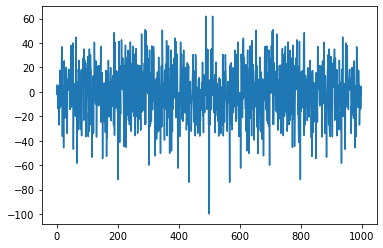

In [61]:
from scipy.fftpack import fft

plt.plot(fft(X).real)